In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')
tweets.sample(n=5)

,id,keyword,location,text,target
3158,4533,emergency,Sacae Plains,in BOTH 'peacetime and times of national emerg...,1
598,866,bioterror,"Jacksonville, FL",[JAX Biz Journal] FedEx stops shipping potenti...,1
2006,2882,damage,"Pontevedra, Galicia",#NP Metallica - Damage Inc,0
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby ...,1
899,1301,bloody,"Level 3 Garrison, Sector G",Bloody hell what a day. I haven't even really ...,0


##### Se reemplaza la columna 'target' por 'about_disaster' para mayor comodidad y se agrega 'length'

In [2]:
tweets_final = tweets.rename(columns={'target':'about_disaster'})
tweets_final['about_disaster'] = ((tweets_final['about_disaster'])==1)
tweets_final['length'] = (tweets_final['text']).str.len()
tweets_final.head()

,id,keyword,location,text,about_disaster,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


# Veracidad por keyword

In [3]:
tweets_final['keyword'].fillna("none_keyword", inplace=True)

In [ ]:
top20_longitud_veraces = 

#### Se agrupa por keyword y se calcula valores relevantes a lo que se busca estudiar (cantidad de tweets veraces y totales, y longitud promedio de los tweets totales, veraces y no veraces por keyword).

In [4]:
tweets_por_keyword = tweets_final.groupby(['keyword']).agg({'about_disaster':['sum','count'],'length':['mean']})
tweets_por_keyword.head()

about_disaster            length
                               sum count        mean
keyword                                             
ablaze                        13.0    36   94.694444
accident                      24.0    35  100.085714
aftershock                     0.0    34  101.205882
airplane%20accident           30.0    35  106.400000
ambulance                     20.0    38   98.394737

In [5]:
tweets_por_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, ablaze to wrecked
Data columns (total 3 columns):
(about_disaster, sum)      222 non-null float64
(about_disaster, count)    222 non-null int64
(length, mean)             222 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.9+ KB


#### Se elimina el MultiIndex

In [6]:
nivel0 = tweets_por_keyword.columns.get_level_values(0)
nivel1 = tweets_por_keyword.columns.get_level_values(1)
tweets_por_keyword.columns = nivel0 + '_' + nivel1
tweets_por_keyword.head()

,about_disaster_sum,about_disaster_count,length_mean
keyword,,,
ablaze,13.0,36,94.694444
accident,24.0,35,100.085714
aftershock,0.0,34,101.205882
airplane%20accident,30.0,35,106.400000
ambulance,20.0,38,98.394737


#### Se renombran y reordenan las columnas para mayor claridad

In [7]:
nuevos_nombres = {'about_disaster_sum':'about_disaster_true', 'about_disaster_count':'count'}
tweets_por_keyword.rename(columns=nuevos_nombres, inplace=True)
tweets_por_keyword.head()

,about_disaster_true,count,length_mean
keyword,,,
ablaze,13.0,36,94.694444
accident,24.0,35,100.085714
aftershock,0.0,34,101.205882
airplane%20accident,30.0,35,106.400000
ambulance,20.0,38,98.394737


In [8]:
tweets_por_keyword['about_disaster_false'] = tweets_por_keyword['count'] - tweets_por_keyword['about_disaster_true']
tweets_por_keyword['veracity'] =  tweets_por_keyword['about_disaster_true']/tweets_por_keyword['count']
tweets_por_keyword = tweets_por_keyword[['about_disaster_true', 'about_disaster_false', 'count', 'veracity', 'length_mean']]
tweets_por_keyword.sort_values(by='veracity', ascending=False, inplace=True)
tweets_por_keyword.head(10)

,about_disaster_true,about_disaster_false,count,veracity,length_mean
keyword,,,,,
wreckage,39.0,0.0,39,1.000000,122.256410
derailment,39.0,0.0,39,1.000000,109.794872
debris,37.0,0.0,37,1.000000,107.594595
outbreak,39.0,1.0,40,0.975000,128.925000
typhoon,37.0,1.0,38,0.973684,111.394737
oil%20spill,37.0,1.0,38,0.973684,102.973684
suicide%20bombing,32.0,1.0,33,0.969697,108.575758
suicide%20bomber,30.0,1.0,31,0.967742,109.032258
bombing,27.0,2.0,29,0.931034,102.482759


#### Se observa el promedio de tweets por keyword para filtrar aquellas que obstruyan el análisis estadístico

In [9]:
tweets_por_keyword['count'].mean()

34.292792792792795

In [25]:
tweets_por_keyword[tweets_por_keyword['count']<34].count()

about_disaster_true     77
about_disaster_false    77
count                   77
veracity                77
length_mean             77
dtype: int64

#### Al enfocar el análisis estadístico a aquellas keywords que posean 34 o más tweets, se dejan de lado 77 keywords (alrededor del 35% del total).

In [26]:
tweets_por_keyword['count'].value_counts()

35    31
34    30
33    26
36    20
37    19
38    16
32    15
39    14
31     9
29     8
40     7
30     6
41     4
42     2
28     2
27     2
22     1
10     1
11     1
12     1
19     1
61     1
24     1
25     1
26     1
45     1
9      1
Name: count, dtype: int64

In [28]:
tweets_por_keyword[tweets_por_keyword['count']<29].count()

about_disaster_true     13
about_disaster_false    13
count                   13
veracity                13
length_mean             13
dtype: int64

#### Al enfocarse en aquellas que tienen 29 o más tweets, el espectro estudiado aumenta claramente. Además, en este caso, 29 no es una diferencia significativa del promedio.

In [11]:
keywords_veraces = (tweets_por_keyword[tweets_por_keyword['count']>=29]).head(20)
keywords_no_veraces = (tweets_por_keyword[tweets_por_keyword['count']>=29]).tail(20)

#### Se procede a graficar

Text(0.5, 1.0, 'Top 20 Keywords con mejor porcentaje de veracidad')

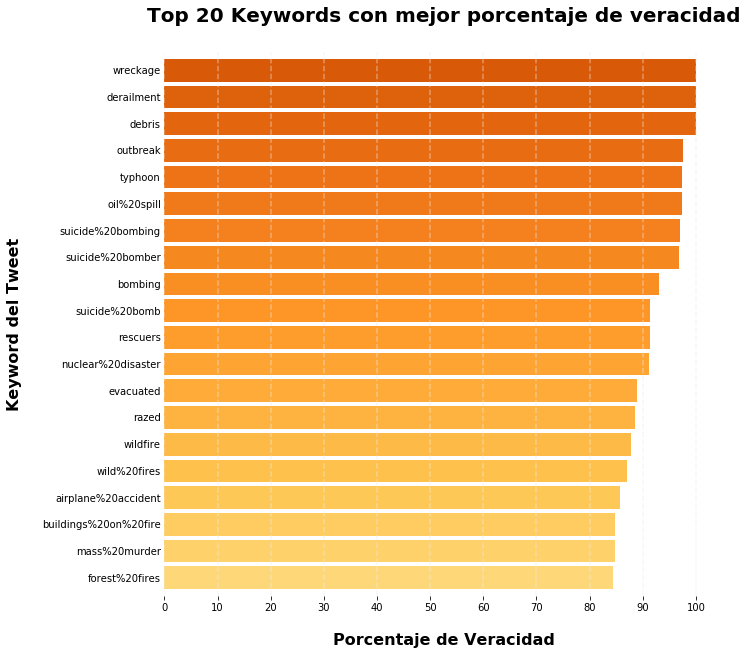

In [12]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top20 = (keywords_veraces['veracity']*100).sort_values().plot(kind='barh', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

top20.spines['right'].set_visible(False)
top20.spines['top'].set_visible(False)
top20.spines['left'].set_visible(False)
top20.spines['bottom'].set_visible(False)

lineas = top20.get_xticks()
for i in lineas:
      top20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
top20.set_ylabel("Keyword del Tweet", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con mejor porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Top 20 Keywords con peor porcentaje de veracidad')

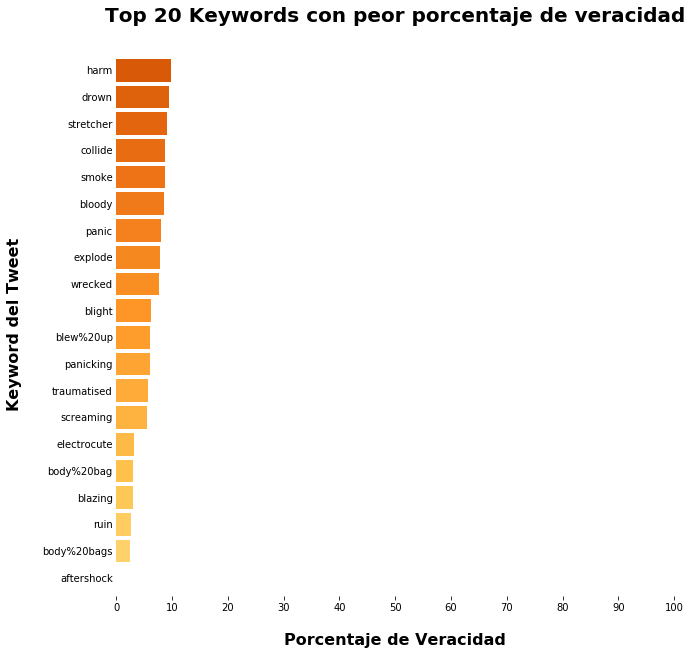

In [13]:
worst20 = (keywords_no_veraces['veracity']*100).sort_values().plot(kind='barh', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

worst20.spines['right'].set_visible(False)
worst20.spines['top'].set_visible(False)
worst20.spines['left'].set_visible(False)
worst20.spines['bottom'].set_visible(False)

lineas = worst20.get_xticks()
for i in lineas:
      top20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
worst20.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
worst20.set_ylabel("Keyword del Tweet", labelpad=20, weight='bold', size=16)

plt.title("Top 20 Keywords con peor porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Cantidad de Keywords por porcentaje de veracidad')

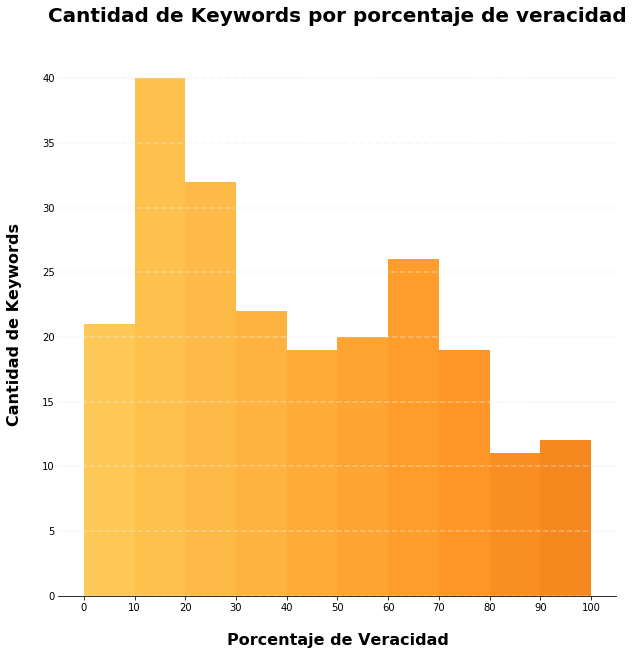

In [14]:
plt.figure(figsize=(10,10))    
n, bins, patches = plt.hist(tweets_por_keyword["veracity"]*100, bins=10, color="c")
hist_porcentajes = plt.gca()

for i,p in enumerate(patches):
    plt.setp(p, "facecolor", colores[i+3])

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(0, 40+1, 5.0))
plt.tick_params(axis='y', length=0)

hist_porcentajes.spines['right'].set_visible(False)
hist_porcentajes.spines['top'].set_visible(False)
hist_porcentajes.spines['left'].set_visible(False)

lineas = hist_porcentajes.get_yticks()
for i in lineas:
      hist_porcentajes.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
hist_porcentajes.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
hist_porcentajes.set_ylabel("Cantidad de Keywords", labelpad=20, weight='bold', size=16)

plt.title("Cantidad de Keywords por porcentaje de veracidad", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords más veraces')

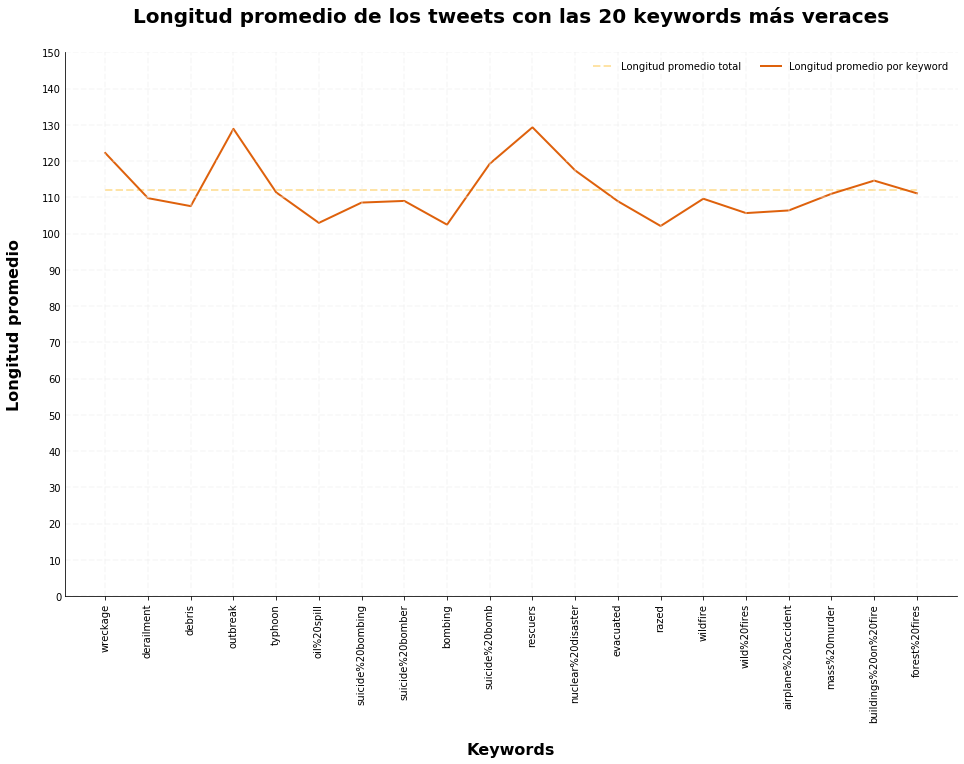

In [69]:
plt.figure(figsize=(16,10)) 
top20_linear = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_veraces['length_mean'].mean()]*len(saltos_x)
top20_linear.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

top20_linear.plot(keywords_veraces.index.values.tolist(), keywords_veraces['length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')

plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 160, 10.0))

top20_linear.spines['right'].set_visible(False)
top20_linear.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = top20_linear.get_xticks()
for i in lineas_x:
      top20_linear.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = top20_linear.get_yticks()
for i in lineas_y:
      top20_linear.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
        
        
top20_linear.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
top20_linear.set_ylabel("Longitud promedio", labelpad=20, weight='bold', size=16)

top20_linear.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords más veraces", weight='bold', size=20, pad=30)

Text(0.5, 1.0, 'Longitud promedio de los tweets con las 20 keywords menos veraces')

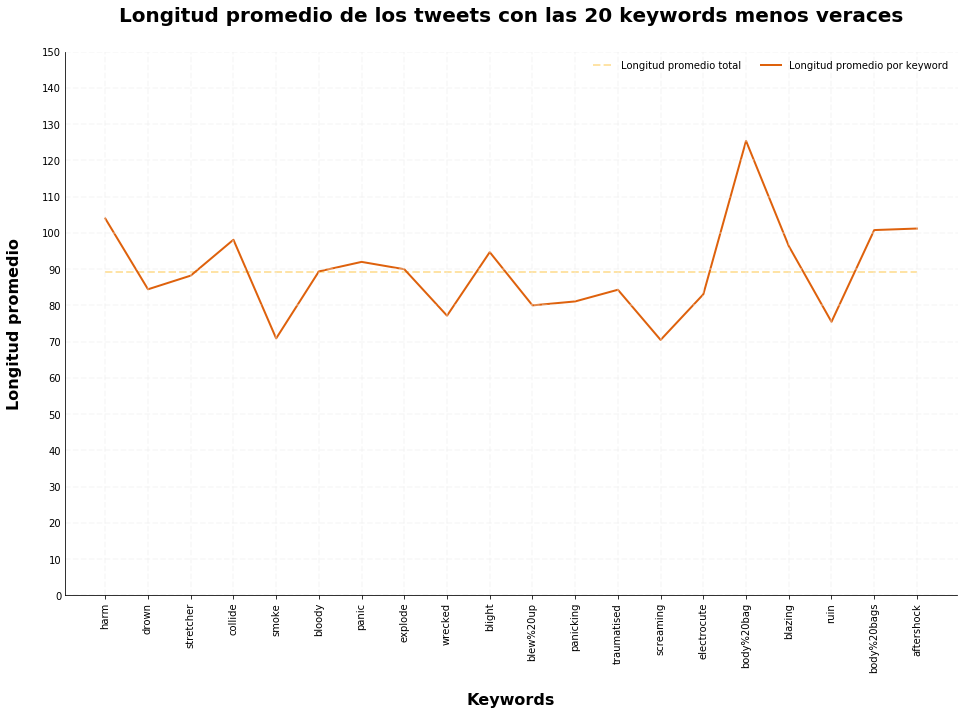

In [73]:
plt.figure(figsize=(16,10)) 
worst20 = plt.subplot()

saltos_x = np.arange(0, 20, 1.0)
longitud_promedio = [keywords_no_veraces['length_mean'].mean()]*len(saltos_x)
worst20.plot(saltos_x, longitud_promedio, lw=2, color=colores[1], \
                  alpha=0.6, linestyle = '--', label='Longitud promedio total')

worst20.plot(keywords_no_veraces.index.values.tolist(), keywords_no_veraces['length_mean'],\
                lw=2, color=colores[18], alpha=1, label='Longitud promedio por keyword')


plt.xticks(saltos_x)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 160, 10.0))

worst20.spines['right'].set_visible(False)
worst20.spines['top'].set_visible(False)
plt.tick_params(axis='y', length=0)

lineas_x = worst20.get_xticks()
for i in lineas_x:
      worst20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
lineas_y = worst20.get_yticks()
for i in lineas_y:
      worst20.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
worst20.set_xlabel("Keywords", labelpad=20, weight='bold', size=16)
worst20.set_ylabel("Longitud promedio", labelpad=20, weight='bold', size=16)

worst20.legend(frameon=False, loc='best', ncol=2)

plt.title("Longitud promedio de los tweets con las 20 keywords menos veraces", weight='bold', size=20, pad=30)